In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

In [46]:
scenario_descriptions = {
    0: "no intervention",
    1: "regular SMC",
    2: "SMC + iver",
    3: "SMC + prim",
    4: "SMC + iver + prim"
}

In [10]:
scenario_dict = {
    0: pd.read_csv("smc_variations/scenario_0.csv"),
    1: pd.read_csv("smc_variations/scenario_1.csv"),
    2: pd.read_csv("smc_variations/scenario_2.csv"),
    3: pd.read_csv("smc_variations/scenario_3.csv"),
    4: pd.read_csv("smc_variations/scenario_4.csv")
}

Text(0.5, 0, 'Day')

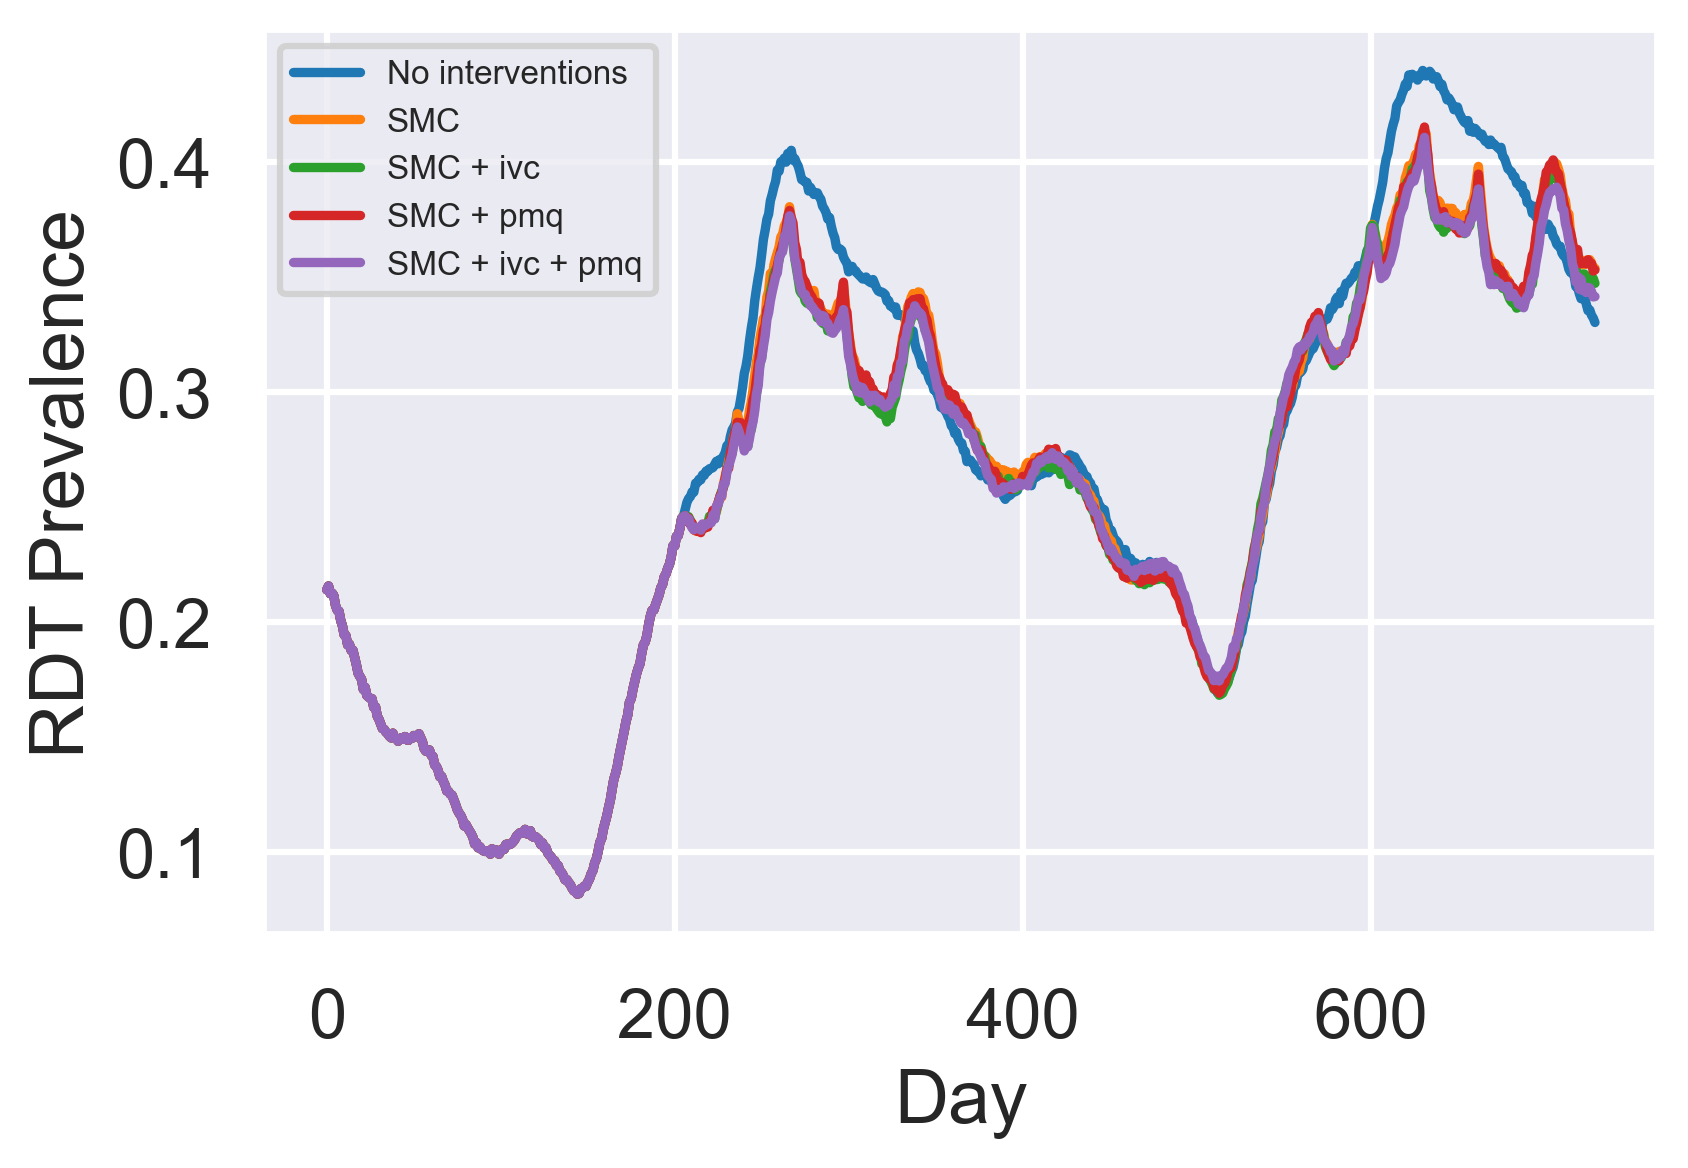

In [18]:
plt.figure(dpi=300)
plt.plot(scenario_dict[0]["avg"], label="No interventions")
plt.plot(scenario_dict[1]["avg"], label="SMC")
plt.plot(scenario_dict[2]["avg"], label="SMC + ivc")
plt.plot(scenario_dict[3]["avg"], label="SMC + pmq")
plt.plot(scenario_dict[4]["avg"], label="SMC + ivc + pmq")
plt.legend(fontsize=8)
plt.ylabel("RDT Prevalence")
plt.xlabel("Day")

In [19]:
df = pd.read_csv("endpoints_10d0e579-c5ae-eb11-a2e3-c4346bcb7275.csv")

In [28]:
df_baseline = df[df["scenario_num"]==0].groupby("burnin_approx_pfpr2_10").agg("mean").reset_index()

In [30]:
df_agg = df.groupby(["burnin_approx_pfpr2_10", "scenario_num"]).agg("mean").reset_index()

df_agg_w_baseline = df_agg.merge(df_baseline, on="burnin_approx_pfpr2_10", suffixes=["","_BASELINE"], how="left")

In [41]:
df_agg_w_baseline["fractional_case_reduction_0_5"] = (df_agg_w_baseline["clinical_incidence0_5_BASELINE"]-df_agg_w_baseline["clinical_incidence0_5"])/df_agg_w_baseline["clinical_incidence0_5_BASELINE"]
df_agg_w_baseline["fractional_case_reduction"] = (df_agg_w_baseline["clinical_incidence_all_BASELINE"]-df_agg_w_baseline["clinical_incidence_all"])/df_agg_w_baseline["clinical_incidence_all_BASELINE"]
df_agg_w_baseline["fractional_pfpr_reduction_0_5"] = (df_agg_w_baseline["pfpr0_5_BASELINE"]-df_agg_w_baseline["pfpr0_5"])/df_agg_w_baseline["pfpr0_5_BASELINE"]
df_agg_w_baseline["fractional_pfpr_reduction"] = (df_agg_w_baseline["pfpr_all_BASELINE"]-df_agg_w_baseline["pfpr_all"])/df_agg_w_baseline["pfpr_all_BASELINE"]

Text(0, 0.5, 'Percent of prevalence reduced')

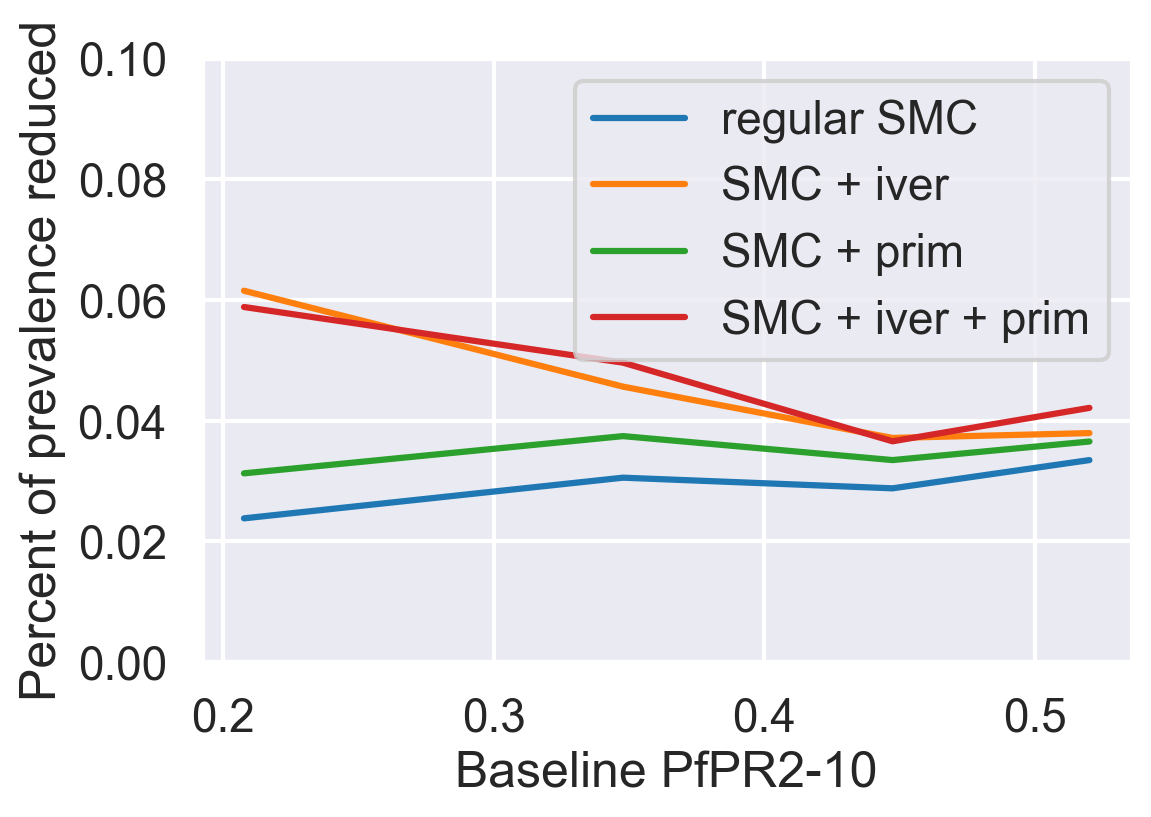

In [48]:
plt.figure(dpi=200)

for s, sdf in df_agg_w_baseline.groupby("scenario_num"):
    if s != 0:
        plt.plot(df_baseline["pfpr2_10"], sdf["fractional_pfpr_reduction"], label=scenario_descriptions[s])
    
plt.legend()
plt.ylim([0,0.1])
plt.xlabel("Baseline PfPR2-10")
plt.ylabel("Percent of prevalence reduced")

Text(0, 0.5, 'Percent of ALL-AGE prevalence reduced')

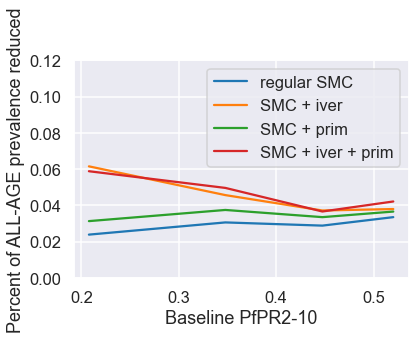

In [94]:
# plt.figure(dpi=200)

for s, sdf in df_agg_w_baseline.groupby("scenario_num"):
    if s != 0:
        plt.plot(df_baseline["pfpr2_10"], sdf["fractional_pfpr_reduction"], label=scenario_descriptions[s])
    
plt.legend()
plt.ylim([0,0.12])
plt.xlabel("Baseline PfPR2-10")
plt.ylabel("Percent of ALL-AGE prevalence reduced")

Text(0, 0.5, 'Percent of UNDER-5 prevalence reduced')

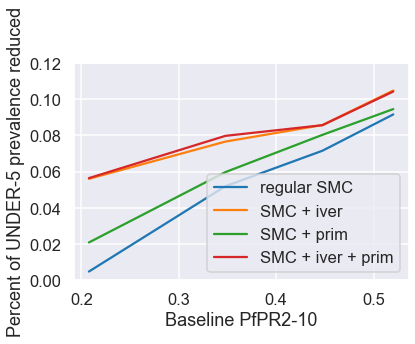

In [95]:
# plt.figure(dpi=200)

for s, sdf in df_agg_w_baseline.groupby("scenario_num"):
    if s != 0:
        plt.plot(df_baseline["pfpr2_10"], sdf["fractional_pfpr_reduction_0_5"], label=scenario_descriptions[s])
    
plt.legend()
plt.ylim([0,0.12])
plt.xlabel("Baseline PfPR2-10")
plt.ylabel("Percent of UNDER-5 prevalence reduced")

Text(0, 0.5, 'Percent of UNDER-5 cases averted')

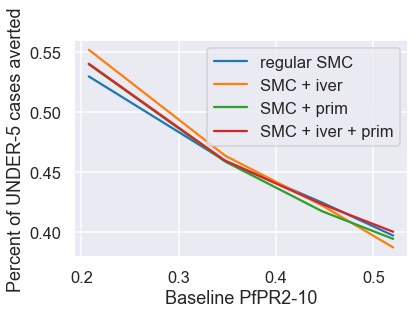

In [98]:
# plt.figure(dpi=200)

for s, sdf in df_agg_w_baseline.groupby("scenario_num"):
    if s != 0:
        plt.plot(df_baseline["pfpr2_10"], sdf["fractional_case_reduction_0_5"], label=scenario_descriptions[s])
    
plt.legend()
# plt.ylim([0,0.1])
plt.xlabel("Baseline PfPR2-10")
plt.ylabel("Percent of UNDER-5 cases averted")

(0.15, 0.35)

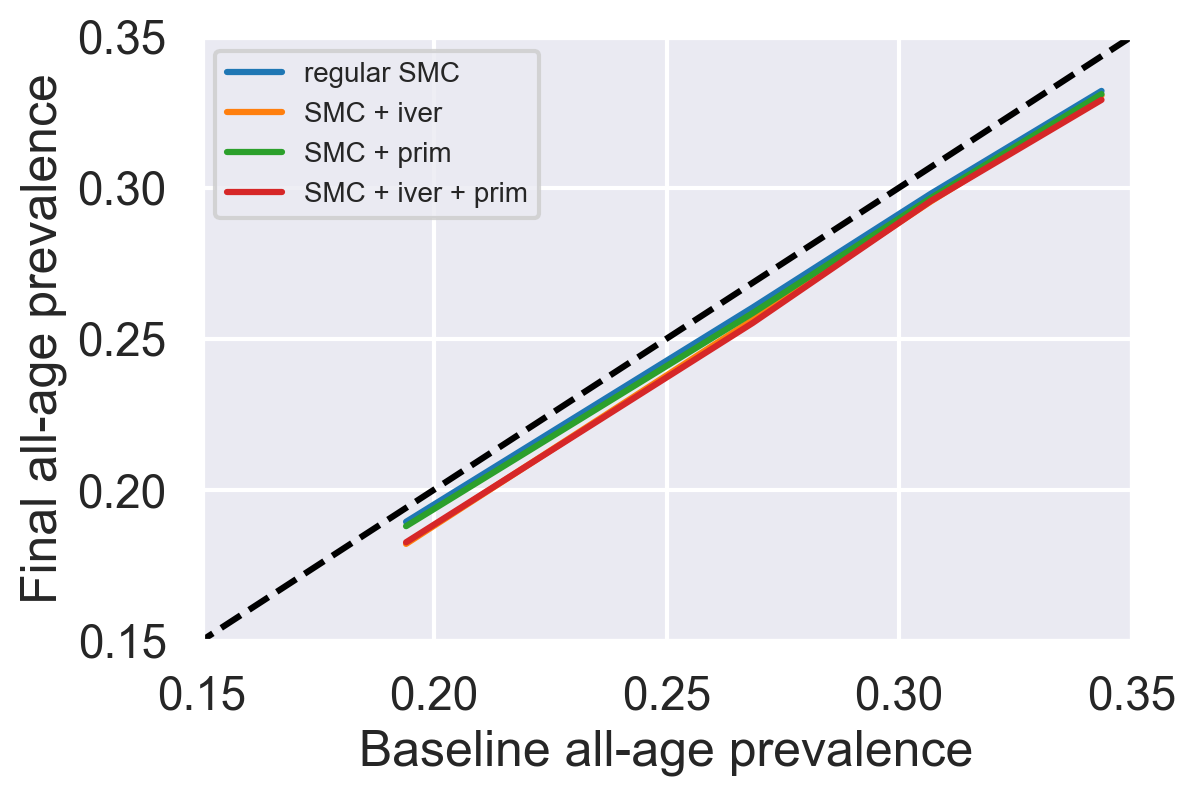

In [68]:
plt.figure(dpi=200)

for s, sdf in df_agg_w_baseline.groupby("scenario_num"):
    if s != 0:
        plt.plot(df_baseline["pfpr_all"], sdf["pfpr_all"], label=scenario_descriptions[s])
plt.plot([0,1],[0,1], color='black', linestyle='dashed')
plt.legend(fontsize=10)
# plt.ylim([0,0.1])
plt.xlabel("Baseline all-age prevalence")
plt.ylabel("Final all-age prevalence")
plt.xlim([0.15,0.35])
plt.ylim([0.15,0.35])

0.19397573923134181
0.18935687316308322


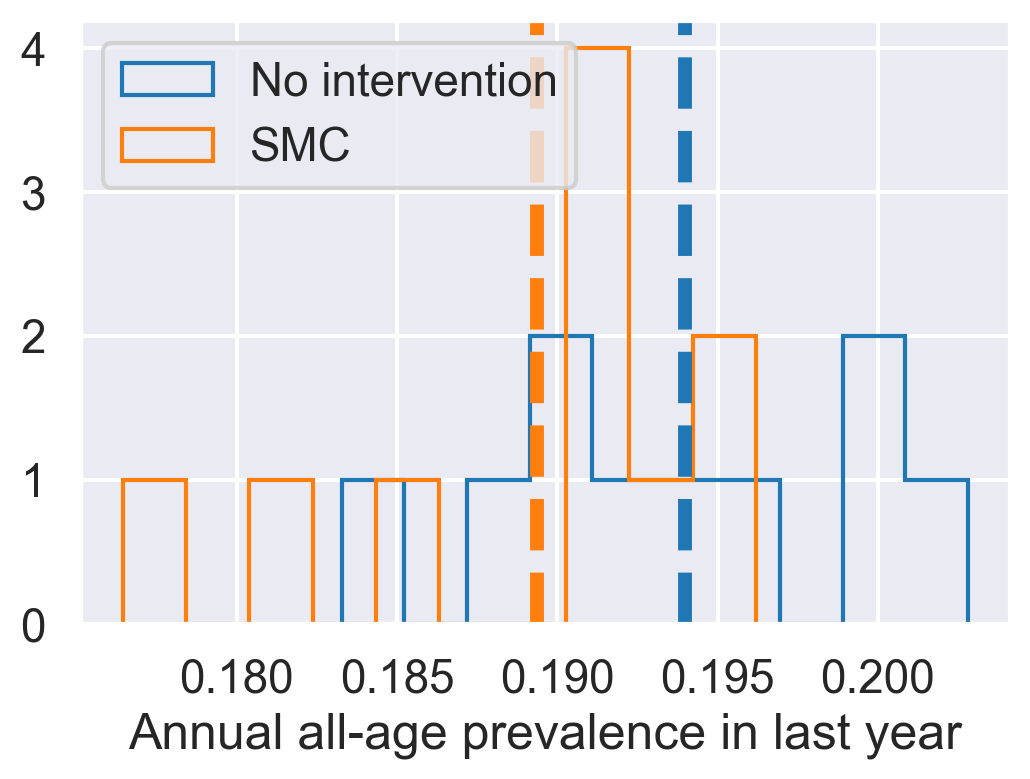

In [89]:
plt.figure(dpi=200)
sdf = df[np.logical_and(df["scenario_num"]==0, df["burnin_approx_pfpr2_10"]==0.05)]
plt.hist(sdf["pfpr_all"], histtype='step', label="No intervention")
plt.axvline(np.mean(sdf["pfpr_all"]), lw=5, linestyle='dashed')
print(np.mean(sdf["pfpr_all"]))
sdf = df[np.logical_and(df["scenario_num"]==1, df["burnin_approx_pfpr2_10"]==0.05)]
plt.hist(sdf["pfpr_all"], histtype='step', label="SMC")
plt.axvline(np.mean(sdf["pfpr_all"]), c="C1", lw=5, linestyle='dashed')
print(np.mean(sdf["pfpr_all"]))
plt.xlabel("Annual all-age prevalence in last year")
plt.legend()

In [90]:
# 0.19397573923134181
# 0.18935687316308322
(0.19397573923134181-0.18935687316308322)/0.19397573923134181

0.023811565748178342

In [76]:
df_baseline

,burnin_approx_pfpr2_10,pfpr0_5,pfpr2_10,pfpr6_15,pfpr16_500,pfpr_all,clinical_incidence0_5,clinical_incidence2_10,clinical_incidence6_15,clinical_incidence16_500,...,burnin_habitat_scale,Run_Number,scenario_num,Received_Treatment,Received_Test,Received_Campaign_Drugs,Received_RCD_Drugs,Received_SMC,Received_Ivermectin,Received_Primaquine
0,0.05,0.118475,0.207648,0.277120,0.185464,0.193976,1.744059,2.002226,1.964381,0.655194,...,7.85,4.5,0.0,4389.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.15,0.234688,0.347772,0.420928,0.213776,0.268529,3.239621,3.217177,2.597586,0.455813,...,8.50,4.5,0.0,6790.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.319932,0.447436,0.496452,0.219887,0.306831,4.347643,3.910786,2.747955,0.270315,...,9.00,4.5,0.0,7942.7,0.0,0.0,0.0,0.0,0.0,0.0
3,0.35,0.411570,0.520228,0.556017,0.234955,0.343534,5.509986,4.428348,2.709433,0.177642,...,9.50,4.5,0.0,9491.2,0.0,0.0,0.0,0.0,0.0,0.0


# Looking explicitly at under-5 prevalence

In [111]:
df = pd.read_csv("u5_prev_timeseries_36a1f403-46af-eb11-a2e3-c4346bcb7275.csv")

In [112]:
foo = df.groupby(["burnin_approx_pfpr2_10", "scenario_num", "scenario_description", "time"]).agg({"prev_under_5": "mean", "new_cases_under_5": "mean"}).reset_index()

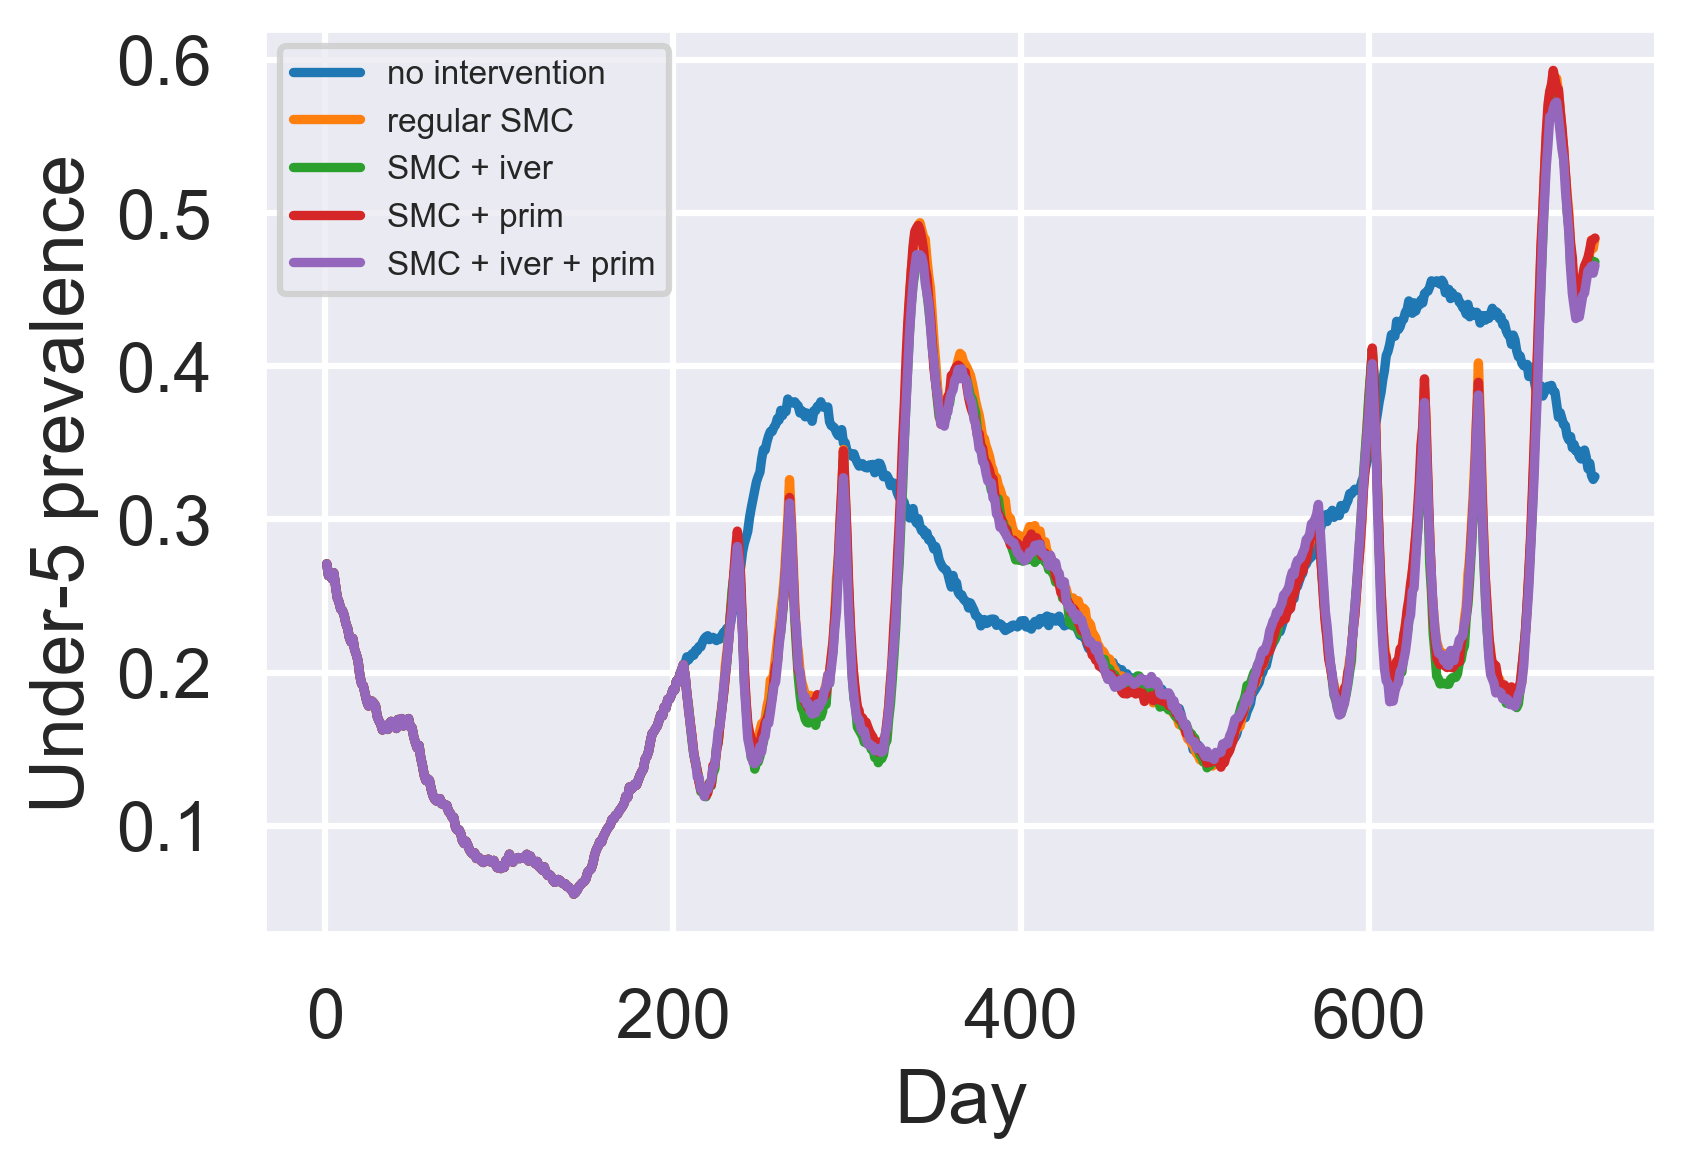

In [109]:
bar = foo[foo["burnin_approx_pfpr2_10"]==0.25]
plt.figure(dpi=300)
for s, sdf in bar.groupby("scenario_num"):
    plt.plot(sdf["time"], sdf["prev_under_5"], label=scenario_descriptions[s])
plt.ylabel("Under-5 prevalence")
plt.xlabel("Day")
plt.legend(fontsize=8)

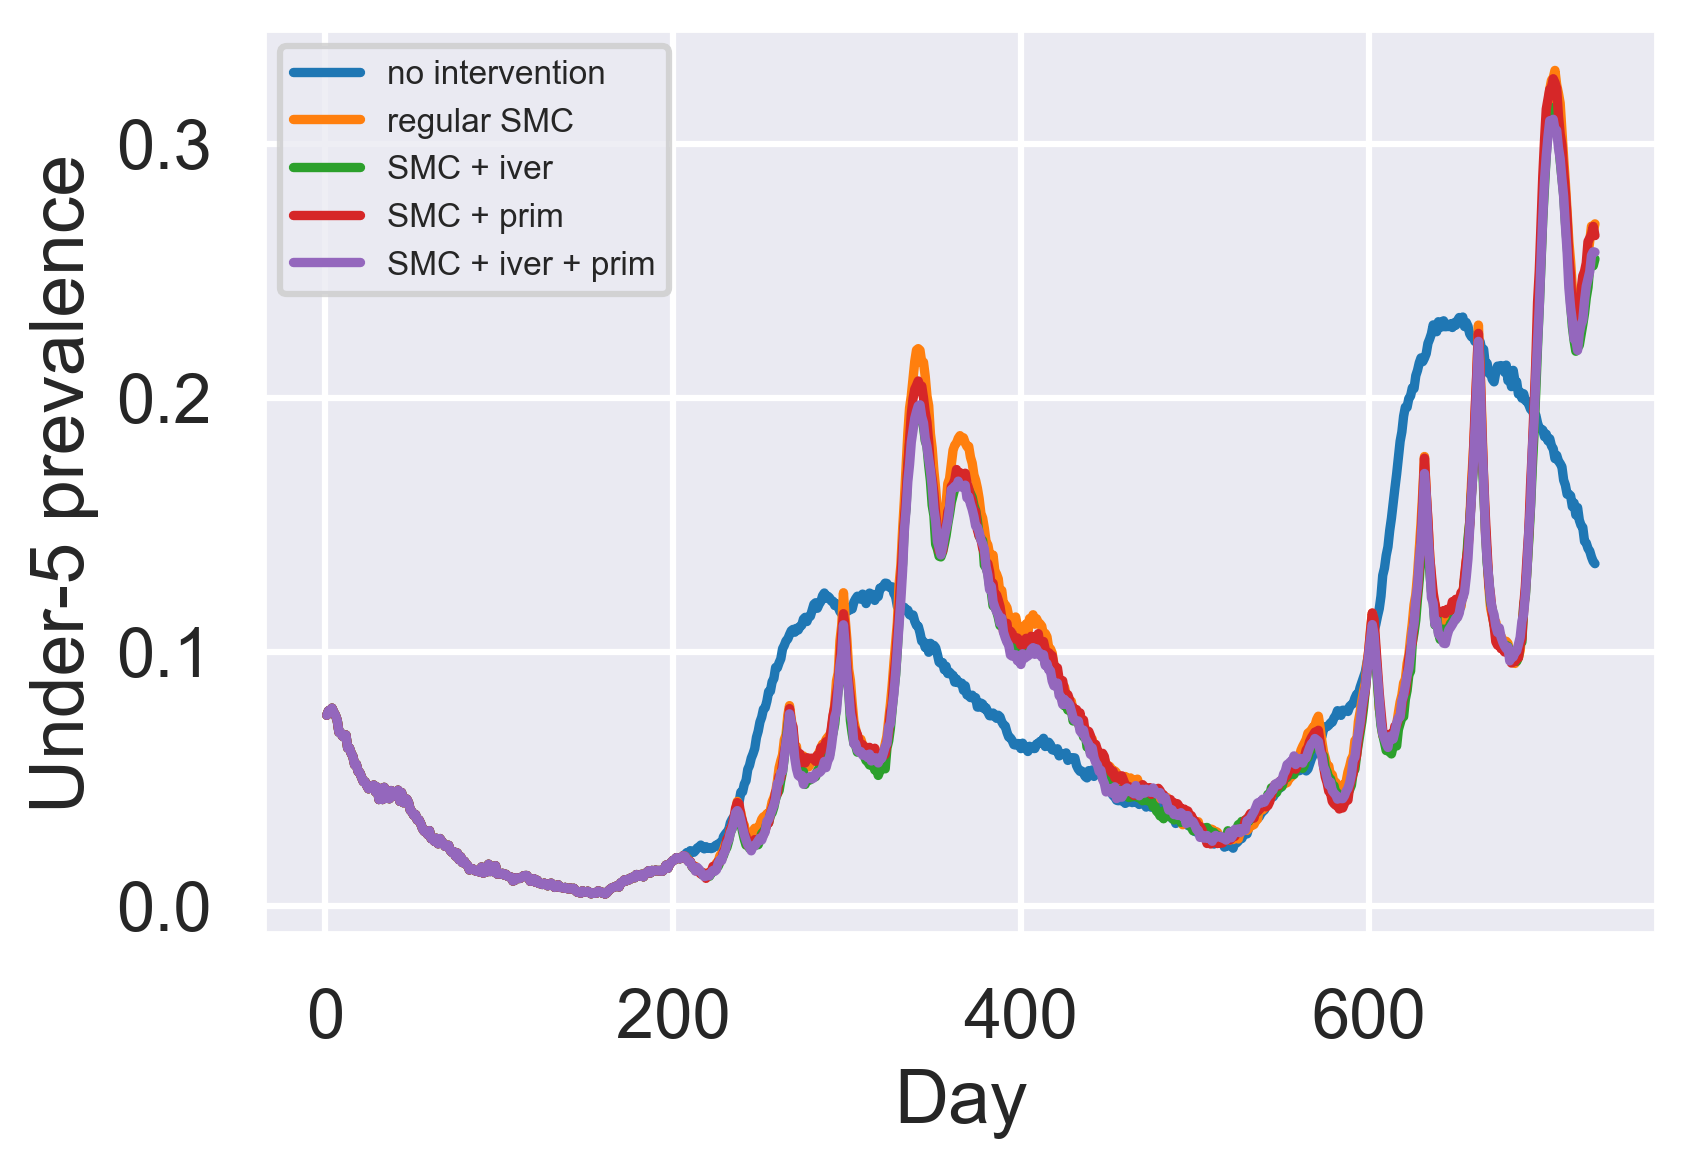

In [110]:
bar = foo[foo["burnin_approx_pfpr2_10"]==0.05]
plt.figure(dpi=300)
for s, sdf in bar.groupby("scenario_num"):
    plt.plot(sdf["time"], sdf["prev_under_5"], label=scenario_descriptions[s])
plt.ylabel("Under-5 prevalence")
plt.xlabel("Day")
plt.legend(fontsize=8)

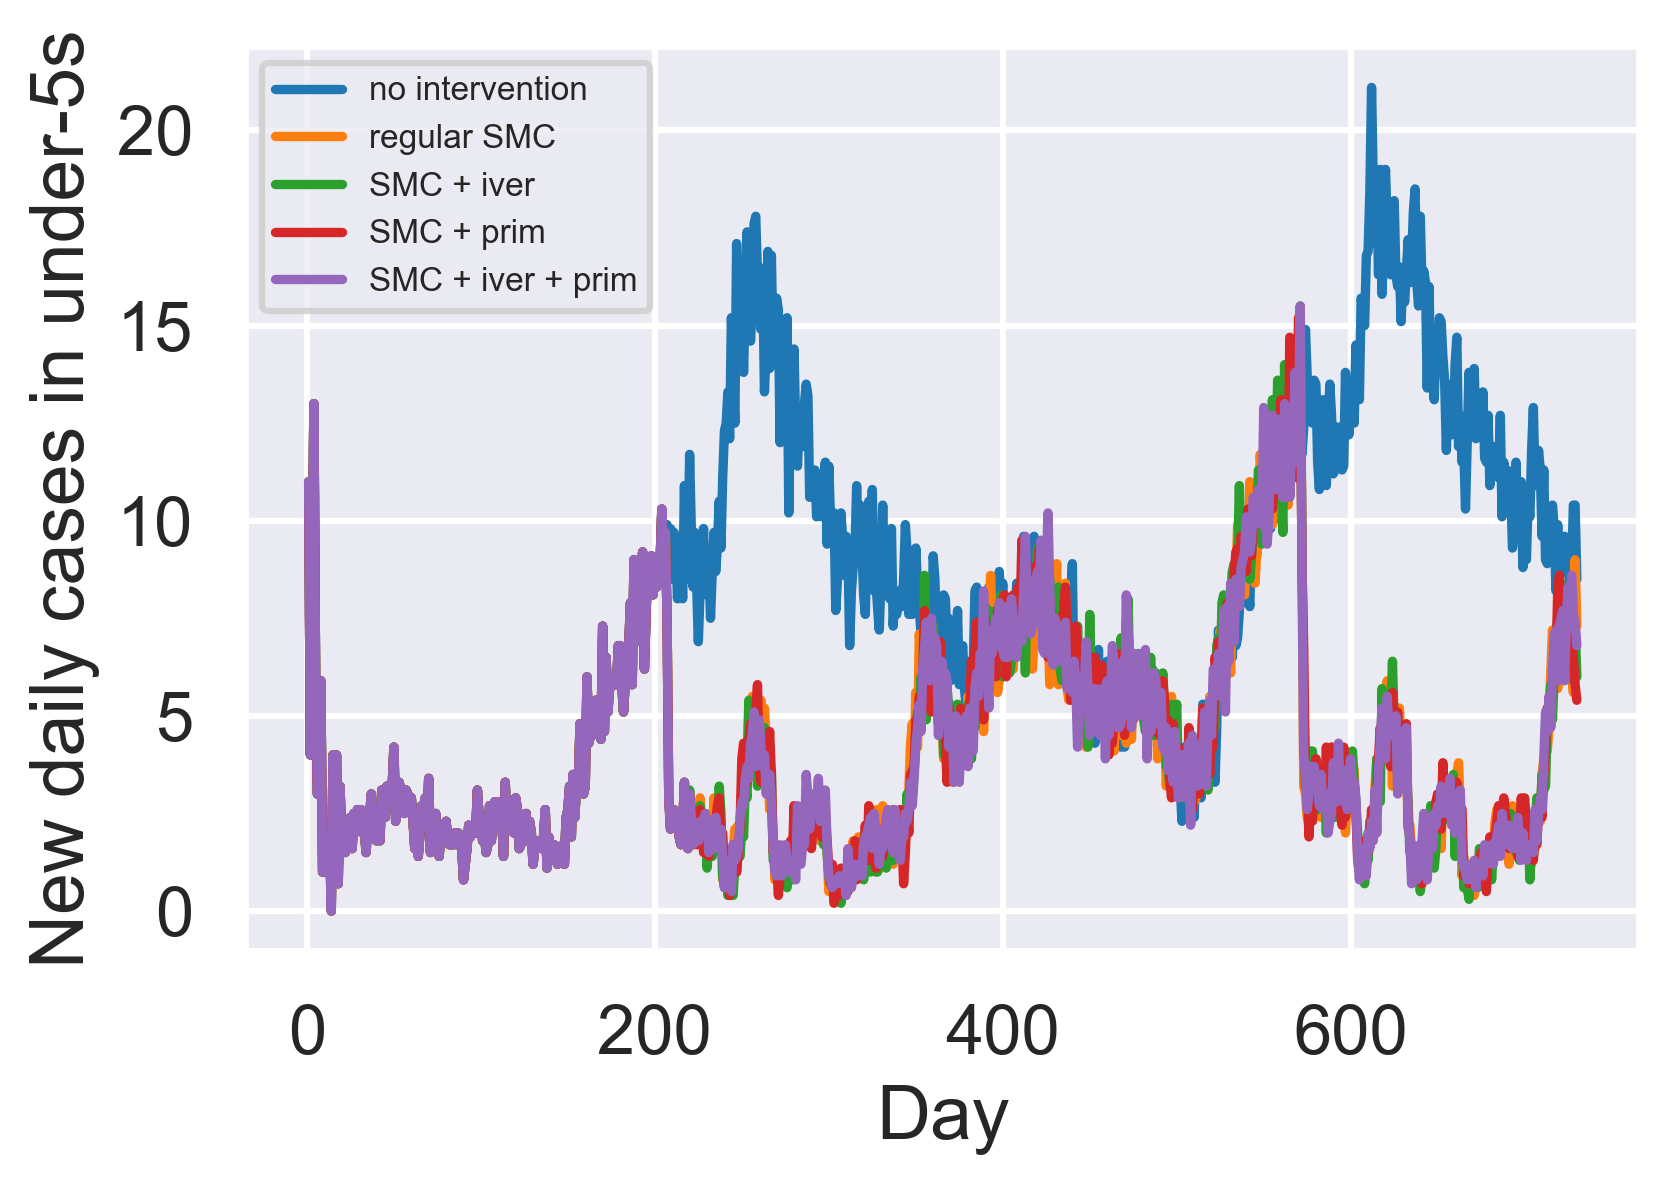

In [115]:
bar = foo[foo["burnin_approx_pfpr2_10"]==0.25]
plt.figure(dpi=300)
for s, sdf in bar.groupby("scenario_num"):
    plt.plot(sdf["time"], sdf["new_cases_under_5"], label=scenario_descriptions[s])
plt.ylabel("New daily cases in under-5s")
plt.xlabel("Day")
plt.legend(fontsize=8)